In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import csv
import os
import numpy
import time
import statistics

In [3]:
#the following codes reads the csv data files and converts them to trainloader and testloader

original_directory = os.getcwd()
TrainList = []
LabelList = []

directory = os.path.join(r'Data_Point\Training\Fault',"3")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            os.chdir(directory)
            with open(file, 'r') as f:
                reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
                your_list = list(reader)
                if (len(your_list) == 3 and len(your_list[0]) == 3):
                    #your_list = normalise_list(your_list,10)
                    TrainList.append(your_list)
                    LabelList.append(1)
            os.chdir(original_directory)
            
directory = os.path.join(r'Data_Point\Training\Non-Fault',"3")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            os.chdir(directory)
            with open(file, 'r') as f:
                reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
                your_list = list(reader)
                if (len(your_list) == 3 and len(your_list[0]) == 3):
                    #your_list = normalise_list(your_list,10)
                    TrainList.append(your_list)
                    LabelList.append(0)
            os.chdir(original_directory)

#print(TrainList[0])
inputs = torch.FloatTensor(TrainList)
#labellist = [0,0,1,1]
labels = torch.tensor(LabelList, dtype=torch.long)
train_data = []
for i in range(len(inputs)):
#    print(csvlabels[i])
    train_data.append([inputs[i], labels[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=10)
print('the size of training dataset and its labels')
print(inputs.shape);
print(labels.shape);

TestList = []
OLabelList = []

directory = os.path.join(r'Data_Point\Testing\Fault',"3")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            os.chdir(directory)
            with open(file, 'r') as f:
                reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
                your_list = list(reader)
                if (len(your_list) == 3 and len(your_list[0]) == 3):
                    #your_list = normalise_list(your_list,10)
                    TestList.append(your_list)
                    OLabelList.append(1)
            os.chdir(original_directory)
            
directory = os.path.join(r'Data_Point\Testing\Non-Fault',"3")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            os.chdir(directory)
            with open(file, 'r') as f:
                reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
                your_list = list(reader)
                if (len(your_list) == 3 and len(your_list[0]) == 3):
                    #your_list = normalise_list(your_list,10)
                    TestList.append(your_list)
                    OLabelList.append(0)
            os.chdir(original_directory)

#print(TrainList[0])
test_inputs = torch.FloatTensor(TestList)
#labellist = [0,0,1,1]
test_labels = torch.tensor(OLabelList, dtype=torch.long)

test_data = []
for i in range(len(test_inputs)):
#    print(csvlabels[i])
    test_data.append([test_inputs[i], test_labels[i]])
    
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=10)
print('the size of testing dataset and its labels')
print(test_inputs.shape);
print(test_labels.shape);

the size of training dataset and its labels
torch.Size([20000, 3, 3])
torch.Size([20000])
the size of testing dataset and its labels
torch.Size([6000, 3, 3])
torch.Size([6000])


In [4]:
# define the two calsses of data for the labels 0 and 1 respectively 

classes = ('non_fault', 'fault')

three random examples of training fault data


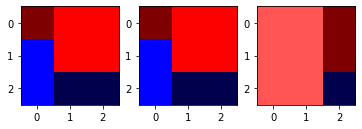

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an seismic data
print('three random examples of training fault data')
plt.subplot(1,3,1)
plt.imshow(inputs[1200], cmap=plt.cm.seismic)
plt.subplot(1,3,2)
plt.imshow(inputs[1600], cmap=plt.cm.seismic)
plt.subplot(1,3,3)
plt.imshow(inputs[8400], cmap=plt.cm.seismic)

three random examples of training non-fault data


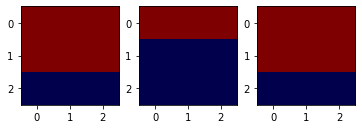

In [6]:
print('three random examples of training non-fault data')
plt.subplot(1,3,1)
plt.imshow(inputs[10800], cmap=plt.cm.seismic)
plt.subplot(1,3,2)
plt.imshow(inputs[14300], cmap=plt.cm.seismic)
plt.subplot(1,3,3)
plt.imshow(inputs[17700], cmap=plt.cm.seismic)

four random examples of testing data


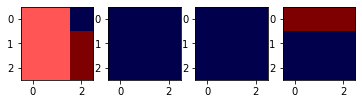

In [7]:
print('four random examples of testing data')
plt.subplot(1,4,1)
plt.imshow(test_inputs[450], cmap=plt.cm.seismic)
plt.subplot(1,4,2)
plt.imshow(test_inputs[2300], cmap=plt.cm.seismic)
plt.subplot(1,4,3)
plt.imshow(test_inputs[4600], cmap=plt.cm.seismic)
plt.subplot(1,4,4)
plt.imshow(test_inputs[5800], cmap=plt.cm.seismic)

In [8]:
#define CNN

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv1 = nn.Conv2d(6, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(16, 25, 3)
        self.conv1 = nn.Conv2d(25, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(9, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 2)

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()


In [9]:
#define loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
#optimizer = optim.Adadelta(net.parameters(), lr=0.0001, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = optim.Adagrad(net.parameters(), lr=0.0001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
#optimizer = optim.AdamW(net.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#optimizer = optim.ASGD(net.parameters(), lr=0.0001, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)
#optimizer = optim.RMSprop(net.parameters(), lr=0.0001, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0, dampening=0, weight_decay=0, nesterov=False)
#optimizer = optim.Rprop(net.parameters(), lr=0.0001, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

In [10]:
#train the network for 20 epochs

for epoch in range(20): # loop over the dataset multiple times

    running_loss = 0.0
    t0 = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 600 == 599:    # print every 600 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 600))
            running_loss = 0.0
    print('{} seconds'.format(time.time() - t0))

print('Finished Training')

[1,   600] loss: 0.693
[1,  1200] loss: 0.692
[1,  1800] loss: 0.693
2.7648122310638428 seconds
[2,   600] loss: 0.693
[2,  1200] loss: 0.692
[2,  1800] loss: 0.693
2.729964017868042 seconds
[3,   600] loss: 0.693
[3,  1200] loss: 0.692
[3,  1800] loss: 0.692
2.722994327545166 seconds
[4,   600] loss: 0.693
[4,  1200] loss: 0.692
[4,  1800] loss: 0.692
2.7409160137176514 seconds
[5,   600] loss: 0.692
[5,  1200] loss: 0.692
[5,  1800] loss: 0.692
2.720010280609131 seconds
[6,   600] loss: 0.692
[6,  1200] loss: 0.692
[6,  1800] loss: 0.692
2.7210052013397217 seconds
[7,   600] loss: 0.692
[7,  1200] loss: 0.692
[7,  1800] loss: 0.692
2.729964017868042 seconds
[8,   600] loss: 0.692
[8,  1200] loss: 0.692
[8,  1800] loss: 0.692
2.7289681434631348 seconds
[9,   600] loss: 0.692
[9,  1200] loss: 0.692
[9,  1800] loss: 0.692
2.727973461151123 seconds
[10,   600] loss: 0.692
[10,  1200] loss: 0.692
[10,  1800] loss: 0.692
2.7249863147735596 seconds
[11,   600] loss: 0.691
[11,  1200] loss: 

In [11]:
#save the network parameters

PATH = './params/seismic_net_3.pth'
torch.save(net.state_dict(), PATH)

In [12]:
#test sample data from testing

dataiter = iter(testloader)
test_ips, labels = dataiter.next()
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(test_ips)
print('predicted non fault and fault probabilities')
print(outputs)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

predicted non fault and fault probabilities
tensor([[0.4707, 0.5293],
        [0.4686, 0.5314],
        [0.4742, 0.5258],
        [0.4644, 0.5356],
        [0.4689, 0.5311],
        [0.4668, 0.5332],
        [0.4577, 0.5423],
        [0.4729, 0.5271],
        [0.4742, 0.5258],
        [0.4637, 0.5363]], grad_fn=<SoftmaxBackward>)
Predicted:  fault


In [13]:
#test the performance of the network on whole dataset

correct = 0.00
total = 0.00
with torch.no_grad():
    for data in testloader:
        seis_data, labels = data
        outputs = net(seis_data)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test dataset: %d %%' % (
    100 * correct / total))
print(total)

Accuracy of the network on the test dataset: 50 %
6000.0


In [14]:
#this part runs the code on GPU 10 times and reports the average accuracy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

acc_list = []
for j in range(10):
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 3)
            self.conv1 = nn.Conv2d(6, 16, 3)
            self.pool = nn.MaxPool2d(2, 2)
            self.conv1 = nn.Conv2d(16, 25, 3)
            self.conv1 = nn.Conv2d(25, 32, 3)
            self.pool = nn.MaxPool2d(2, 2)
            self.fc1 = nn.Linear(9, 32)
            self.fc2 = nn.Linear(32, 16)
            self.fc3 = nn.Linear(16, 8)
            self.fc4 = nn.Linear(8, 2)

        def forward(self, x):
            x = x.view(-1, self.num_flat_features(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)
            x = F.softmax(x, dim=1)
            return x
    
        def num_flat_features(self, x):
            size = x.size()[1:]  # all dimensions except the batch dimension
            num_features = 1
            for s in size:
                num_features *= s
            return num_features

    net = Net()
    net.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(net.parameters(), lr=0.0001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
    
    for epoch in range(20): # loop over the dataset multiple times
        running_loss = 0.0
        t0 = time.time()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    print('Finished Training for %d'% (j+1))
    
    PATH = './seismic_net_3.pth'
    torch.save(net.state_dict(), PATH)
    dataiter = iter(testloader)
    test_ips, labels = dataiter.next()[0].to(device), dataiter.next()[1].to(device)
    net = Net()
    net.load_state_dict(torch.load(PATH))
    net.to(device)
    
    correct = 0.00
    total = 0.00
    with torch.no_grad():
        for data in testloader:
            seis_data, labels = data[0].to(device), data[1].to(device)
            outputs = net(seis_data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accur = 100*(correct/total)
    acc_list.append(accur)
avg_acc = statistics.mean(acc_list)
print ("the avg acc is ")
print(avg_acc)

cuda:0
Finished Training for 1
Finished Training for 2
Finished Training for 3
Finished Training for 4
Finished Training for 5
Finished Training for 6
Finished Training for 7
Finished Training for 8
Finished Training for 9
Finished Training for 10
the avg acc is 
52.48


In [15]:
#this part is same code as above (runs 10 times and reports avg accuracy) but doesn't need GPU to run

acc_list = []
for j in range(10):
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 3)
            self.conv1 = nn.Conv2d(6, 16, 3)
            self.pool = nn.MaxPool2d(2, 2)
            self.conv1 = nn.Conv2d(16, 25, 3)
            self.conv1 = nn.Conv2d(25, 32, 3)
            self.pool = nn.MaxPool2d(2, 2)
            self.fc1 = nn.Linear(9, 32)
            self.fc2 = nn.Linear(32, 16)
            self.fc3 = nn.Linear(16, 8)
            self.fc4 = nn.Linear(8, 2)

        def forward(self, x):
            x = x.view(-1, self.num_flat_features(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)
            x = F.softmax(x, dim=1)
            return x
    
        def num_flat_features(self, x):
            size = x.size()[1:]  # all dimensions except the batch dimension
            num_features = 1
            for s in size:
                num_features *= s
            return num_features

    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(net.parameters(), lr=0.0001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
    
    for epoch in range(20): # loop over the dataset multiple times
        running_loss = 0.0
        t0 = time.time()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    print('Finished Training for %d'% (j+1))
    
    PATH = './seismic_net_3.pth'
    torch.save(net.state_dict(), PATH)
    dataiter = iter(testloader)
    test_ips, labels = dataiter.next()
    net = Net()
    net.load_state_dict(torch.load(PATH))
    
    correct = 0.00
    total = 0.00
    with torch.no_grad():
        for data in testloader:
            seis_data, labels = data
            outputs = net(seis_data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accur = 100*(correct/total)
    acc_list.append(accur)
avg_acc = statistics.mean(acc_list)
print ("the avg acc is ")
print(avg_acc)

Finished Training for 1
Finished Training for 2
Finished Training for 3
Finished Training for 4
Finished Training for 5
Finished Training for 6
Finished Training for 7
Finished Training for 8
Finished Training for 9
Finished Training for 10
the avg acc is 
52.75
